# Taxi and Limousine Commission (TLC) Project        
 
---  

## <span id='summary'> Executive Summary</span>  
Lorem ipsum dolor sit amet, consectetur adipiscing elit. Maecenas lobortis augue vel tristique semper. Etiam eu lectus a leo molestie venenatis ac nec tortor. Suspendisse ornare, ipsum vitae mattis consequat, augue leo volutpat dolor, et hendrerit arcu massa quis nisl. Sed nibh risus, blandit non vehicula id, euismod eu lacus. Curabitur scelerisque metus velit, et tincidunt mauris ultricies vitae. 
 
---  
## <span id='all'>All about Projects</span>  
    
#### Project Context  
The majority of New Yorkers depend on public transportation or taxi services. Only 22% of Manhattan residents own a car, compared to an average of 91% of households across the United States owning at least one car. Taxi service in New York is the fourth largest transportation network in the United States. The system is regulated by the New York City Taxi and Limousine Commission (TLC), which oversees yellow taxis, charter taxis, commuter cars, transit vehicles, and certain limousines. Despite its large network, the current system does not serve the boroughs equally. Because of this, residents prefer illegal taxi services that have inconsistent access and fares.


#### Project Requirement   

1. What causes the yellow taxi service to only be concentrated in certain boroughs, causing an imbalance in demand and supply in other boroughs?  
2. TLC wants their yellow taxi services to be spread evenly throughout the city of New York so they can respond to existing demand. What should TLC do in the short term (6 months) to overcome this challenge?  
3. Finding meaningful information inside the given dataset!


#### Project Planning  
1. Exploratory Data Analysis (EDA)
    - Data Structure Check (shape, datatype, head, tail)
    - Data Quality Check (missing value, outlier, distribution)
    - Data Cleaning (missing value, outlier, inappropiate values, high cardinality)
    - Content Investigation (hypothesis testing, predictive power check through descriptive/visualization and analytics)
2. Data Preporcessing & Feature Engineering
3. Feature Selection
4. Models Training
5. Models Evaluation   

---    

## Content  

  
[**Executive Summary**](#summary)  
[**All About Project**](#all)  
[**Content**](#content)   
  
[**1. Exploratory Data Analysis (EDA)**](#1)  
    - [Data Structure Check](#1.1)  
    - [Data Quality Check](#1.2)  
    - [Univariate Analysis](#1.3)    
    - [Bivariate Analysis](#1.4)  
    - [Data Cleaning](#1.5)  
    - [Content Investigation/Ad-hoc Analysis](#1.6)  
[**2. Data Preporcessing & Feature Engineering**](#2)  
[**3. Feature Selection**](#3)  
[**4. Models Training**](#4)  
[**5. Models Evaluation**](#5)  

---


## Dataset Dictionary

| Column | Description |
| :---        |    :----   |
| VendorID | A code indicating the TPEP provider that provided the record. (1= Creative Mobile Technologies, LLC; 2= VeriFone Inc.)|
| tpep_pickup_datetime | The date and time when the meter was engaged. |
| tpep_dropoff_datetime | The date and time when the meter was disengaged. |
| Passenger_count | The number of passengers in the vehicle. This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
| RateCodeID | The final rate code in effect at the end of the trip. (1= Standard rate, 2=JFK, 3=Newark, 4=Nassau or Westchester, 5=Negotiated fare, 6=Group ride) |
| Store_and_fwd_flag | This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server. (Y= store and forward trip N= not a store and forward trip) |
| Payment_type | A numeric code signifying how the passenger paid for the trip. (1= Credit card, 2= Cash, 3= No charge, 4= Dispute, 5= Unknown, 6= Voided trip) |
| Fare_amount | The time-and-distance fare calculated by the meter.|
| Extra | Miscellaneous extras and surcharges. Currently, this only includes the 0.50 and 1 rush hour and overnight charges. |
| Total_amount | The total amount charged to passengers. Does not include cash tips. |
| Improvement_surcharge | \$0.30 improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
| tip_amount | Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip. |
| Congestion_Surcharge | Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | \$1.25 for pick up only at LaGuardia and John F. Kennedy Airports |
| MTA_tax | \$0.50 MTA tax that is automatically triggered based on the metered rate in use.|

---  


**Feature Enginnering - Notes**  

- dummy variable: 'VendorID', 'borough', 'Payment_type', 'RateCodeID', 

- derived variables:
    - tip_amount: `is_tip`
    - tolls_amount: `is_toll`
    
    - tpep_pickup_datetime : `tpep_pickup_date` `tpep_pickup_time` `tpep_pickup_hour` `tpep_pickup_day` `tpep_pickup_weekday` `tpep_pickup_is_weekend` `tpep_pickup_is_business_day`

    
    - tpep_dropoff_datetime: `tpep_dropoff_date` `tpep_dropoff_time` `tpep_dropoff_hour` `tpep_dropoff_day` `tpep_dropoff_weekday` `tpep_dropoff_is_weekend` `tpep_dropoff_is_business_day`
    
    
- new variables:  
    - 'time_elapsed': 'tpep_dropoff_datetime' - 'tpep_pickup_datetime'  
    - 'speed': 'Trip_distance'/'time_elapsed'
    - 'fare_per_distance': 'fare_amoung' / 'Trip_distance'
    
    - 'average_pessanger_per_borough'
    - 'median_pessanger_per_borough'
    - '95percentile_pessanger_per_borough'
    - '99percentile_pessanger_per_borough'
    
    - 'average_fare_amount_per_borough'
    - 'median_fare_amount_per_borough'
    - '95percentile_fare_amount_per_borough'
    - '99percentile_fare_amount_per_borough'
    

## <span id=1> 1. Exploratory Data Analysis (EDA)</span>  

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

pd.pandas.set_option('display.max_columns',None)
pd.options.display.float_format = "{:.4f}".format
sns.set()

In [72]:
df = pd.read_parquet('..\dataset\yellow_tripdata_2021-09.parquet')
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2021-09-01 06:04:34,2021-09-01 06:15:28,2.0000,4.9000,1.0000,N,87,229,1,16.0000,0.5000,0.5000,2.0000,0.0000,0.3000,21.8000,2.5000,0.0000
1,2,2021-09-01 06:26:31,2021-09-01 06:32:39,1.0000,1.1300,1.0000,N,162,229,1,6.0000,0.5000,0.5000,1.9600,0.0000,0.3000,11.7600,2.5000,0.0000
2,2,2021-09-01 06:36:15,2021-09-01 06:40:30,2.0000,1.3700,1.0000,N,141,262,1,6.0000,0.5000,0.5000,1.9600,0.0000,0.3000,11.7600,2.5000,0.0000
3,1,2021-09-01 00:00:15,2021-09-01 00:18:34,2.0000,6.5000,1.0000,N,90,260,2,21.0000,3.0000,0.5000,0.0000,6.5500,0.3000,31.3500,2.5000,0.0000
4,2,2021-09-01 00:44:54,2021-09-01 00:56:33,1.0000,2.3200,1.0000,N,75,238,2,10.5000,0.5000,0.5000,0.0000,0.0000,0.3000,11.8000,0.0000,0.0000


In [73]:
# lookup table reference: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

borough = pd.read_csv('..\\dataset\\taxi+_zone_lookup.csv')
borough = borough[['LocationID', 'Borough']]
borough.head()

,LocationID,Borough
0,1,EWR
1,2,Queens
2,3,Bronx
3,4,Manhattan
4,5,Staten Island


In [74]:
df = pd.merge(df, borough, how='inner', left_on='PULocationID', right_on='LocationID')
df = pd.merge(df, borough, how='inner', left_on='DOLocationID', right_on='LocationID')

In [75]:
df.drop(['LocationID_y', 'LocationID_x'], axis=1, inplace=True)

In [76]:
df = df.rename(columns={"Borough_x": "PU_Borough", "Borough_y": "DO_Borough"})
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,PU_Borough,DO_Borough
0,2,2021-09-01 06:04:34,2021-09-01 06:15:28,2.0000,4.9000,1.0000,N,87,229,1,16.0000,0.5000,0.5000,2.0000,0.0000,0.3000,21.8000,2.5000,0.0000,Manhattan,Manhattan
1,2,2021-09-01 07:50:57,2021-09-01 08:05:50,1.0000,5.6200,1.0000,N,87,229,1,18.0000,0.0000,0.5000,4.2600,0.0000,0.3000,25.5600,2.5000,0.0000,Manhattan,Manhattan
2,2,2021-09-01 08:40:25,2021-09-01 08:57:03,1.0000,5.9800,1.0000,N,87,229,1,19.0000,0.0000,0.5000,2.0000,0.0000,0.3000,24.3000,2.5000,0.0000,Manhattan,Manhattan
3,2,2021-09-01 13:16:32,2021-09-01 13:30:06,1.0000,6.1800,1.0000,N,87,229,1,19.0000,0.0000,0.5000,5.5800,0.0000,0.3000,27.8800,2.5000,0.0000,Manhattan,Manhattan
4,2,2021-09-01 14:50:59,2021-09-01 15:02:57,2.0000,4.9800,1.0000,N,87,229,2,16.0000,0.0000,0.5000,0.0000,0.0000,0.3000,19.3000,2.5000,0.0000,Manhattan,Manhattan


In [18]:
df.info()

# Note:
    ## shape (2963793, 21)
    ## datatypes are okay
    
# To do:
    ## to save up some memories, it is better to convert some datatype into lower memory usage

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2963793 entries, 0 to 2963792
Data columns (total 21 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [16]:
100 * df['PU_Borough'].value_counts(normalize=True)

# Note:
    ## almost 90% of pick-up borough is Manhattan, the 10% is others
    ## For simplifying, I will convert it into binary
    
# To do:
    ## Convert 'PU_Borough' into binary
    ## Rename 'PU_Borough' into 'PU_Borough_Manhattan'

Manhattan       89.9966
Queens           7.4751
Unknown          1.2043
Brooklyn         1.0305
Bronx            0.2713
Staten Island    0.0119
EWR              0.0103
Name: PU_Borough, dtype: float64

In [41]:
100 * df['DO_Borough'].value_counts(normalize=True)

# Note:
    ## almost 90% of drop-off borough is Manhattan, the 10% is others

Manhattan       89.5719
Queens           4.7656
Brooklyn         3.7649
Unknown          0.9418
Bronx            0.7466
EWR              0.1791
Staten Island    0.0302
Name: DO_Borough, dtype: float64

In [40]:
len(df[( df['PU_Borough']=='Manhattan') & (df['DO_Borough']=='Manhattan')]) / len(df)

# To-do:
    # make a target column to describe the taxi operation that only focus on Manhattan area
    # I would call it with 'target_manhattan'
    # if the pick-up & drop-off in Manhattan then give 1, else 0

0.8506709999755401

In [19]:
100*df.isna().sum()/len(df)

# Note:
    ## 4.82% of missing value
    
# To do:
    ## Explore & find the context

VendorID                0.0000
tpep_pickup_datetime    0.0000
tpep_dropoff_datetime   0.0000
passenger_count         4.8200
trip_distance           0.0000
RatecodeID              4.8200
store_and_fwd_flag      4.8200
PULocationID            0.0000
DOLocationID            0.0000
payment_type            0.0000
fare_amount             0.0000
extra                   0.0000
mta_tax                 0.0000
tip_amount              0.0000
tolls_amount            0.0000
improvement_surcharge   0.0000
total_amount            0.0000
congestion_surcharge    4.8200
airport_fee             4.8200
PU_Borough              0.0000
DO_Borough              0.0000
dtype: float64

In [20]:
df.describe(include='number').T

# Note:
    ## The dataset might have some outliers
    ## inappropiate values found!
        ### negative values in 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'total_amount', 
        ### 'improvement_surcharge', 'congestion_surcharge', 'airport_fee'

# To do:
    ## Check the data dictionary
    ## Find more context in it

,count,mean,std,min,25%,50%,75%,max
VendorID,2963793.0000,1.7193,0.5328,1.0000,1.0000,2.0000,2.0000,6.0000
passenger_count,2820939.0000,1.4238,1.0257,0.0000,1.0000,1.0000,1.0000,9.0000
trip_distance,2963793.0000,6.5836,656.7038,0.0000,1.1000,1.9000,3.4900,317182.4500
RatecodeID,2820939.0000,1.1172,2.4775,1.0000,1.0000,1.0000,1.0000,99.0000
PULocationID,2963793.0000,164.2187,66.3514,1.0000,125.0000,162.0000,234.0000,265.0000
DOLocationID,2963793.0000,161.9331,70.7368,1.0000,112.0000,162.0000,234.0000,265.0000
payment_type,2963793.0000,1.1804,0.5248,0.0000,1.0000,1.0000,1.0000,4.0000
fare_amount,2963793.0000,14.4505,475.4842,-474.0000,7.0000,10.0000,16.0000,818283.4400
extra,2963793.0000,1.0429,1.2511,-5.5000,0.0000,0.5000,2.5000,9.5500
mta_tax,2963793.0000,0.4924,0.0762,-0.5000,0.5000,0.5000,0.5000,3.3000


In [23]:
# quantile stats description for numerical columns

nmric_cols = df.select_dtypes(include='number').columns
quantile_stat = {}

for col in nmric_cols:
    range_quartile = df[col].max() - df[col].min()
    interquartile = df[col].quantile(0.75) - df[col].quantile(0.25)
    lower_bound = df[col].quantile(0.25) - 1.5*interquartile
    higher_bound = df[col].quantile(0.75) + 1.5*interquartile
    
    quantile_stat[col] = [range_quartile, interquartile, lower_bound, higher_bound]
    
quantile_stat = pd.DataFrame(quantile_stat).T
quantile_stat.columns = ['range', 'interquartile', 'lower_bound', 'higher_bound']
quantile_stat = pd.concat([df.describe(include='number').T, quantile_stat], axis=1)

quantile_stat['low_outliers'] = np.vectorize(lambda x, y: 1 if x>y else 0)(quantile_stat['lower_bound'], quantile_stat['min'])
quantile_stat['high_outliers'] = np.vectorize(lambda x, y: 1 if x<y else 0)(quantile_stat['higher_bound'], quantile_stat['max'])

quantile_stat


# Note
    ## The outliers found in the 'high_outliers' & 'low_outliers' columns
    
# To do
    ## Check & find some context
    ## Remove outliers & analyze the general theme ???

,count,mean,std,min,25%,50%,75%,max,range,interquartile,lower_bound,higher_bound,low_outliers,high_outliers
VendorID,2963793.0000,1.7193,0.5328,1.0000,1.0000,2.0000,2.0000,6.0000,5.0000,1.0000,-0.5000,3.5000,0,1
passenger_count,2820939.0000,1.4238,1.0257,0.0000,1.0000,1.0000,1.0000,9.0000,9.0000,0.0000,1.0000,1.0000,1,1
trip_distance,2963793.0000,6.5836,656.7038,0.0000,1.1000,1.9000,3.4900,317182.4500,317182.4500,2.3900,-2.4850,7.0750,0,1
RatecodeID,2820939.0000,1.1172,2.4775,1.0000,1.0000,1.0000,1.0000,99.0000,98.0000,0.0000,1.0000,1.0000,0,1
PULocationID,2963793.0000,164.2187,66.3514,1.0000,125.0000,162.0000,234.0000,265.0000,264.0000,109.0000,-38.5000,397.5000,0,0
DOLocationID,2963793.0000,161.9331,70.7368,1.0000,112.0000,162.0000,234.0000,265.0000,264.0000,122.0000,-71.0000,417.0000,0,0
payment_type,2963793.0000,1.1804,0.5248,0.0000,1.0000,1.0000,1.0000,4.0000,4.0000,0.0000,1.0000,1.0000,1,1
fare_amount,2963793.0000,14.4505,475.4842,-474.0000,7.0000,10.0000,16.0000,818283.4400,818757.4400,9.0000,-6.5000,29.5000,1,1
extra,2963793.0000,1.0429,1.2511,-5.5000,0.0000,0.5000,2.5000,9.5500,15.0500,2.5000,-3.7500,6.2500,1,1
mta_tax,2963793.0000,0.4924,0.0762,-0.5000,0.5000,0.5000,0.5000,3.3000,3.8000,0.0000,0.5000,0.5000,1,1


In [24]:
# check for kurtosis & skewness

nmric_cols = df.select_dtypes(include='number').columns
skew_kurt = {}

for col in nmric_cols:
    skew_kurt[col] = [df[col].kurtosis(), df[col].skew()]

skew_kurt = pd.DataFrame(skew_kurt).T
skew_kurt.columns = ['kurtosis', 'skewness']
skew_kurt


# Notes:
    ## by looking at the kurtosis & skewness, almost all columns have non-Gaussian distribution
    
# To do:
    ## consider to use a model that doesn't have a constraint of a normal distribution
    ## e.g. ensemble model

,kurtosis,skewness
VendorID,15.1135,1.4961
passenger_count,7.2518,2.6110
trip_distance,95204.5179,276.2922
RatecodeID,1525.0358,38.6984
PULocationID,-0.9503,-0.2484
DOLocationID,-0.9889,-0.3237
payment_type,3.2225,0.9769
fare_amount,2959324.2501,1719.6199
extra,0.2429,1.0170
mta_tax,128.3529,-10.8464


In [21]:
df.describe(exclude='number')

# Note:
    ## The last 'tpep_pickup_datetime' is 2098-09-11 02:23:31 ???
    ## The last 'tpep_dropoff_datetime' is 2098-09-11 02:52:04 ???

C:\Users\ichfa\AppData\Local\Temp\ipykernel_15296\1805651458.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(exclude='number')
C:\Users\ichfa\AppData\Local\Temp\ipykernel_15296\1805651458.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(exclude='number')


,tpep_pickup_datetime,tpep_dropoff_datetime,store_and_fwd_flag,PU_Borough,DO_Borough
count,2963793,2963793,2820939,2963793,2963793
unique,1565270,1564534,2,7,7
top,2021-09-15 17:22:00,2021-09-04 00:00:00,N,Manhattan,Manhattan
freq,28,32,2785439,2667312,2622985
first,2003-01-03 12:54:36,2003-01-04 09:35:38,NaN,NaN,NaN
last,2098-09-11 02:23:31,2098-09-11 02:52:04,NaN,NaN,NaN


In [26]:
df.duplicated().sum() 

# Note: no duplication

0

In [30]:
df['payment_type'].value_counts(dropna=False, normalize=True)

1   0.7350
2   0.2087
0   0.0482
3   0.0044
4   0.0037
Name: payment_type, dtype: float64

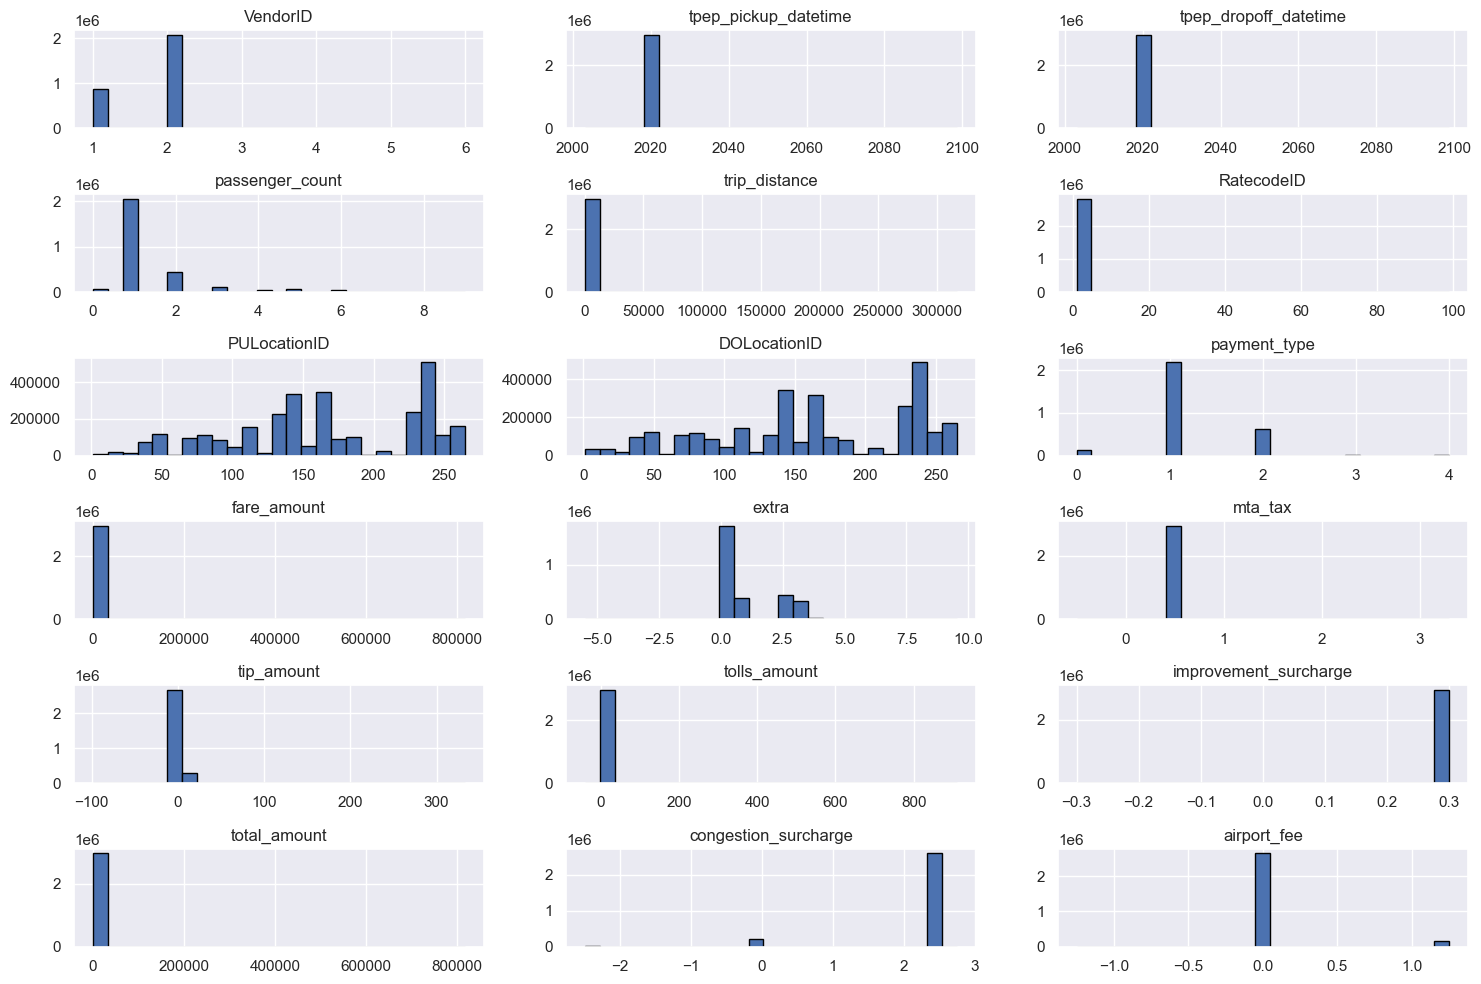

In [27]:
df.hist(bins=25, figsize=(15,10), layout=(-1,3), edgecolor="black")
plt.tight_layout();

# Note:
    ## 'VendorID' inappropriate value found -> it should be either 1 or 2
    ## 'tpep_pickup_datetime' & 'tpep_dropoff_datetime' outliers
    ## 'passenger_count' inappropriate value found -> it should be more than 0
    ## drop inappropiate value (negative values) in some columns
    ## some columns might be more meaningful if we convert it into categorical variable
    
    
# To do:
    ## drop inappropiate value in 'VendorID', 'passenger_count', 
    ## drop outliers in 'tpep_pickup_datetime' & 'tpep_dropoff_datetime'\
    ## drop negative values (inappropiate) in 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 
        ## 'tolls_amount', 'total_amount', 'improvement_surcharge', 'congestion_surcharge', 'airport_fee'
    ## convert to categorical 'VendorID' 'RateCodeID' 'Payment_type' 'PULocationID' 'DOLocationID'

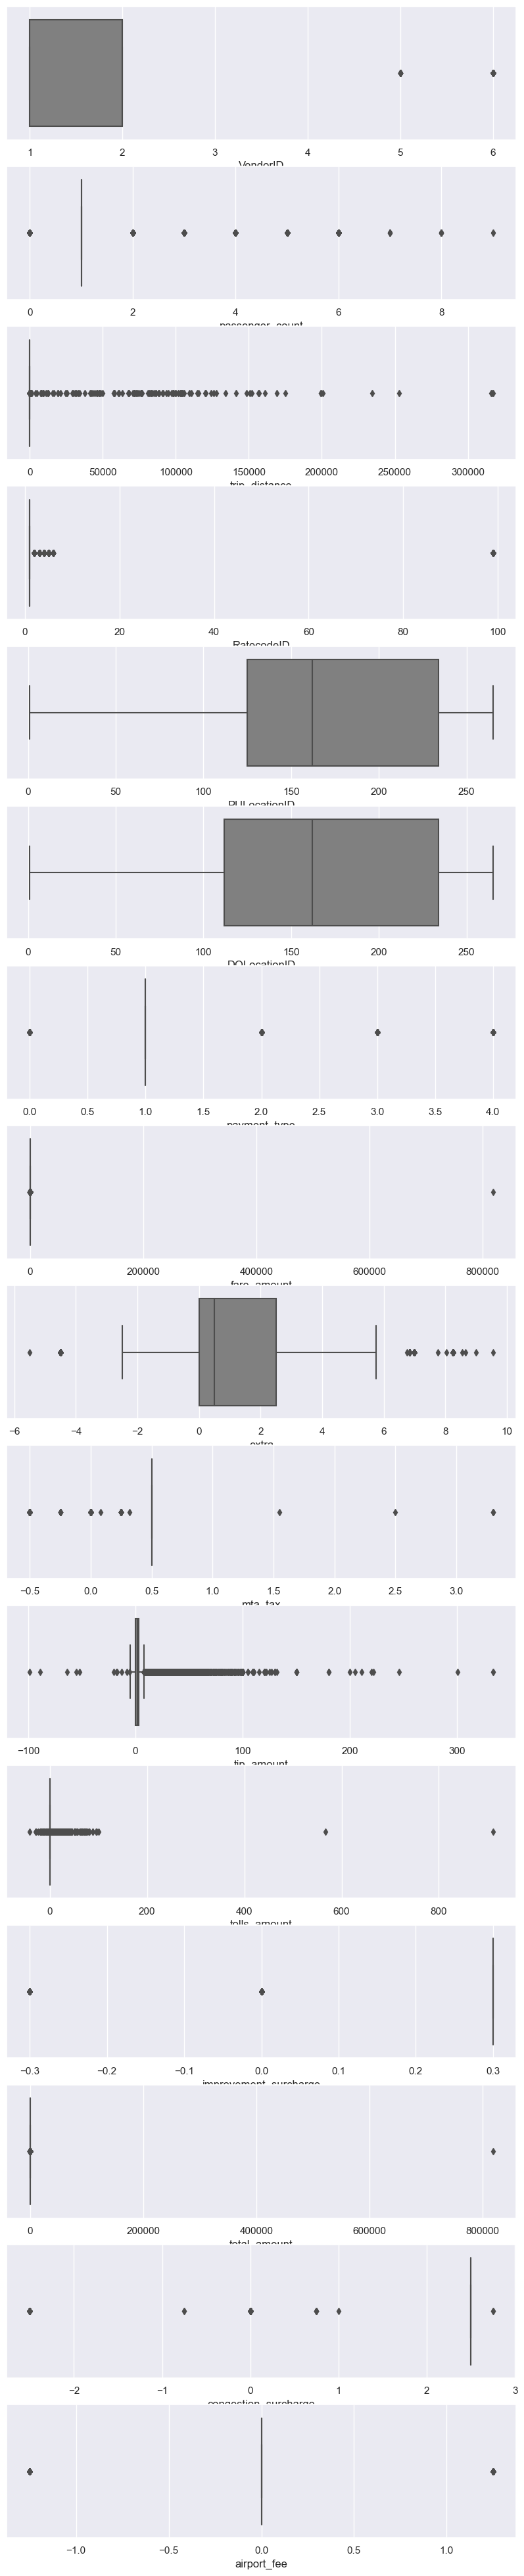

In [37]:
# outliers could be spotted through boxplot

nmric_cols = df.select_dtypes(include='number').columns

fig, axes = plt.subplots(len(nmric_cols), 1, figsize=(10,50))
for i, col in enumerate(nmric_cols):
    sns.boxplot(ax=axes[i], x=df[col], orient='h', color='gray')
    
# Note:
    # spot some outliers

In [38]:
cat_cols = df.select_dtypes(exclude='number').columns

for col in cat_cols:
    if df[col].nunique() < 20 and df[col].nunique() != 1: # no more high cardinality
        print(f'Distribution of {col}:')
        print(df[col].value_counts(dropna=False, normalize=True)*100)
        print()
        
# Note:
    ## some missing value in store_and_fwd_flag
    
# To do:
    ## drop missing values

Distribution of store_and_fwd_flag:
N      93.9822
None    4.8200
Y       1.1978
Name: store_and_fwd_flag, dtype: float64

Distribution of PU_Borough:
Manhattan       89.9966
Queens           7.4751
Unknown          1.2043
Brooklyn         1.0305
Bronx            0.2713
Staten Island    0.0119
EWR              0.0103
Name: PU_Borough, dtype: float64

Distribution of DO_Borough:
Manhattan       88.5010
Queens           5.2693
Brooklyn         4.1356
Unknown          0.9389
Bronx            0.9060
EWR              0.2122
Staten Island    0.0370
Name: DO_Borough, dtype: float64



### Data Cleaning & Preps

In [77]:
# drop missing value
df.dropna(inplace=True)

In [78]:
# create the target column
df['target_manhattan'] = np.vectorize(lambda x, y: 1 if (x=='Manhattan') and (y == 'Manhattan') else 0)(df['PU_Borough'], df['DO_Borough'])

In [79]:
# drop inappropiate value in 'VendorID', 'passenger_count', 

df.drop(labels=df[~df['VendorID'].isin([1,2])].index,
       axis=0,
       inplace=True)

df.drop(labels=df[df['passenger_count'] == 0].index,
       axis=0,
       inplace=True)

In [80]:
df['tpep_pickup_year'] = df['tpep_pickup_datetime'].apply(lambda x: x.year)
df['tpep_dropoff_year'] = df['tpep_dropoff_datetime'].apply(lambda x: x.year)

In [55]:
df['tpep_pickup_year'].value_counts(normalize=True, dropna=False)

2021   1.0000
2009   0.0000
2008   0.0000
2098   0.0000
2003   0.0000
Name: tpep_pickup_year, dtype: float64

In [81]:
# drop pickup_year in other than 2021

df.drop(labels= df[df['tpep_pickup_year'] != 2021].index,
        axis=0,
        inplace=True)

In [58]:
df['tpep_dropoff_year'].value_counts(normalize=True, dropna=False)

2021   1.0000
Name: tpep_dropoff_year, dtype: float64

In [82]:
# drop negative values (inappropiate)

neg_cols = ['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', \
 'total_amount', 'improvement_surcharge', 'congestion_surcharge', 'airport_fee']

for col in neg_cols:
    df.drop(labels= df[df[col] < 0].index,
        axis=0,
        inplace=True)

In [83]:
# inappropiate in value in 'RatecodeID'

df.drop(labels= df[df['RatecodeID'] == 99].index,
    axis=0,
    inplace=True)

In [88]:
# inappropiate in numerical format
# mapped out into categorical data
# 'VendorID' 'RateCodeID' 'Payment_type' 'PULocationID' 'DOLocationID'

vendor_id = {1: 'Creative Mobile Technologies, LLC', 
             2: 'VeriFone Inc.'}

payment_type = {1: 'Credit card', 
                2: 'Cash', 
                3: 'No charge', 
                4: 'Dispute', 
                5: 'Unknown', 
                6: 'Voided trip'}

ratecodeid = {1: 'Standard rate', 
              2: 'JFK', 
              3: 'Newark', 
              4: 'Nassau or Westchester', 
              5: 'Negotiated fare', 
              6: 'Group ride'}



df['VendorID'] = df['VendorID'].map(vendor_id).values
df['RatecodeID'] = df['RatecodeID'].map(ratecodeid).values
df['payment_type'] = df['payment_type'].map(payment_type).values

In [95]:
df['PULocationID'] = df['PULocationID'].astype('string')
df['DOLocationID'] = df['DOLocationID'].astype('string')

In [99]:
# save file
df.to_parquet('..\\dataset\\df_clean.parquet')

### Finding Meaningful Info (AdHoc Analysis)

## <span id=2> 2. Data Preporcessing & Feature Engineering</span>  

## <span id=3> 3. Feature Selection</span>  

## <span id=4> 4. Models Training</span>  

## <span id=5> 5. Models Evaluation</span>  